<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_Doc_Emb_NewBeta_TermSelector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rm -r *.pkl*

rm: cannot remove '*.pkl*': No such file or directory


# **Download Data (Documents)**

In [ ]:
def download_twenty_news():
  !wget https://www.dropbox.com/s/09y9y1h0xk3cxaj/embeddings_twentynews.pkl
  !wget https://www.dropbox.com/s/ewv3vcwgll0r8a7/data_twentynews_labels.pkl
  !wget https://www.dropbox.com/s/chpjn9lzr7rmn2k/fixed_data_twentynews_preprocessed.pkl

In [ ]:
def download_reuters():
  !wget https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
  !wget https://www.dropbox.com/s/bgc1ht0jsyjed6s/embeddings_reuters.pkl
  !wget https://www.dropbox.com/s/9fk30bjzeefvhgl/data_reuters_preprocessed.pkl

In [ ]:
def download_webkb():
  !wget https://www.dropbox.com/s/wz88fk42r0viqvo/data_webkb_preprocessed.pkl
  !wget https://www.dropbox.com/s/8oi5qactwrar1ad/data_webkb_labels.pkl
  !wget https://www.dropbox.com/s/go7r4h39q6l01d5/embeddings_webkb.pkl

In [ ]:
def download_WoS():
  !wget https://www.dropbox.com/s/c6wlr148lhwsbaz/embeddings_wos.pkl
  !wget https://www.dropbox.com/s/j96061ln6oeejkf/data_wos_preprocessed.pkl
  !wget https://www.dropbox.com/s/kiffa4nidkjt7wi/data_wos_labels.pkl

In [ ]:
import os
def download_unzip_crowdgender():
  !wget https://www.dropbox.com/s/trz5uph29b0t0eg/data_crowder.zip
  os.system('unzip data_crowder.zip')

In [ ]:
def download_data(data):
  data = data.lower()
  if data == 'reuters':
    download_reuters()
  elif data == 'twenty_news':
    download_twenty_news()
  elif data == 'crowdgender':
   download_unzip_crowdgender()
  elif data == 'webkb':
    download_webkb()
  elif data == 'wos':
    download_WoS()

#**0. Just Run these..**

In [ ]:
#@title Imports
# from sympy.stats import RaisedCosine, density
import torch
import pandas as pd
from torch import nn
import re
from time import time
import numpy as np
import collections
import gc
from sklearn.feature_extraction.text import CountVectorizer
import torch.nn
cos_sim = nn.CosineSimilarity(dim=-1,eps=1e-08)
# from nltk.corpus import stopwords

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#@title Data Loading functions..

def load_crowdgender():
  data_preprocessed = load_obj('data_crowdgender_preprocessed')
  data_preprocessed_labels = load_obj("data_crowdgender_labels")
  embeddings = load_obj('embeddings_crowdgender')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_crowdgender.__name__

def load_reuters():
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_reuters.__name__

def new_50_twenty_news():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_docs')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_docs")
  return data_preprocessed,data_preprocessed_labels,embeddings,new_50_twenty_news.__name__

def new_50_twenty_news_sent():
  embeddings = load_obj('50_embeddings_twentynews_docs')
  data_preprocessed = load_obj('50_data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("50_data_twentynews_labels_sent")
  doc_sent_id = load_obj('50_doc_id_sent')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,new_50_twenty_news_sent.__name__


def load_20News_50():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_docs_preprocessed')
  data_preprocessed_labels = load_obj("50_docs_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_50.__name__

def load_20News_50_sentences():
  embeddings = load_obj('50_embeddings_load_20news_docs')
  data_preprocessed = load_obj('50_data_load_20news_sentences_preprocessed')
  data_preprocessed_labels = load_obj("50_data_load_20news_sentences_labels")
  doc_sent_id = load_obj('50_doc_id_sent_load_20news_sentences')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_50_sentences.__name__

def load_20News():
  embeddings = load_obj('embeddings_twentynews')
  # data_preprocessed = load_obj('data_twentynews_preprocessed')
  data_preprocessed = load_obj('fixed_data_twentynews_preprocessed')
  data_preprocessed_labels = load_obj("data_twentynews_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News.__name__

def load_20News_sentences():
  embeddings = load_obj('embeddings_twentynews_sent')
  data_preprocessed = load_obj('data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("data_twentynews_labels_sent")
  doc_sent_id = load_obj('doc_id_sent_twentynews')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_sentences.__name__

def load_20News_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed.extend(load_obj('data_20News_preprocessed'))
  data_preprocessed_labels.extend(load_obj("data_20news_preprocessed_labels"))
  embeddings.update(load_obj('embeddings_20news'))
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_reuters.__name__

def load_r52():
  data_preprocessed = load_obj('data_r52_preprocessed')
  data_preprocessed_labels = load_obj("data_r52_labels")
  embeddings = load_obj('embeddings_r52')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_r52.__name__

def load_WebKb():
  data_preprocessed = load_obj('data_webkb_preprocessed')
  data_preprocessed_labels = load_obj("data_webkb_labels")
  embeddings = load_obj('embeddings_webkb')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WebKb.__name__

def load_WoS():
  data_preprocessed = load_obj('data_wos_preprocessed')
  data_preprocessed_labels = load_obj("data_wos_labels")
  embeddings = load_obj('embeddings_wos')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WoS.__name__
def load_arXiv():
  data_preprocessed = load_obj('data_arxiv_preprocessed')
  data_preprocessed_labels = load_obj("data_arxiv_labels")
  embeddings = load_obj('embeddings_arxiv')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_arXiv.__name__

In [ ]:
# @title get_keywords
def get_keywords(data):
  keywords_arxiv = ['molecular ','stimulation','liquid','fluid']
  keywords_webkb = ['student','department','india']
  keywords_r52 = ['mutual','fund','market','money']

  keywords_WoS = ['pediatric','protein','clone']
  keywords_20News_Reuters = ['oil','price','opec','bpd','barrel','saudi','production','mln','crude']

  # keywords_reuters = ['company', 'analyst', 'offer', 'pct', 'takeover', 'merger', 'record', 'dividend', 'pay', 'stock']
  # keywords_reuters = ['stock', 'dividend', 'inc']
  # keywords_reuters = ['oil','crude','ship']
  # keywords =['stock']
  keywords_reuters = ['usa']

  keywords_crowdgender = ['housewife','girl','beautiful','blonde']

  keywords_20News = ['sport','game','baseball']
  # keywords_20News = ['looking' ,'add', 'voice' ,'input', 'capability', 'user', 'interface']
  keywords=[]
  data = data.lower()
  if data=='reuters': keywords = keywords_reuters
  elif data=='twenty_news':keywords = keywords_20News
  elif data=='crowdgender':keywords = keywords_crowdgender
  elif data=='webkb':keywords = keywords_webkb
  else:
    print('keyword list not found!!!')
  return keywords

In [ ]:
#@title DESM Score
def cosine_similarity_desm_docs(query_list, train_vec, vocab, embeddings):
  num_docs = len(train_vec)
  num_voc = len(vocab)
  sim_list = torch.zeros(num_docs)
  index = 0
  id_vocab = dict(map(reversed, vocab.items()))
  for d in range(num_docs):
    if(d%5000==0): print(d)
    doc_bar = torch.zeros(300)
    doc_length = 0
    for v in range(num_voc):
      if(train_vec[d][v] > 0):
        doc_bar.add_(train_vec[d][v] * torch.from_numpy(embeddings[id_vocab[v]])/torch.norm(torch.from_numpy(embeddings[id_vocab[v]])))
        doc_length = doc_length + train_vec[d][v]
    doc_bar = doc_bar / doc_length
    sum = 0

    for q in query_list:
      sum += torch.dot(torch.from_numpy(embeddings[q]) , doc_bar)/(torch.norm(torch.from_numpy(embeddings[q]))*torch.norm(doc_bar))
    sum = sum/len(query_list)
    sim_list[index]=sum
    index = index + 1

  return sim_list

# **1. Data Loading**

In [ ]:
#### Data Downloading ####
d_data= 'reuters' # reuters, twenty_news, webkb, wos, crowdgender
download_data(d_data) ### Run Once

--2021-07-21 01:21:57--  https://www.dropbox.com/s/8khmuj31il8zgkp/data_reuters_labels.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8khmuj31il8zgkp/data_reuters_labels.pkl [following]
--2021-07-21 01:21:58--  https://www.dropbox.com/s/raw/8khmuj31il8zgkp/data_reuters_labels.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0868e922ce5e97d5ba5630163.dl.dropboxusercontent.com/cd/0/inline/BSo45_WqIZ5rgir8qhMwr2G2Lsn-2yv4-odZy5tm_KN3fZayYk3WXwJtFaY4pQWC5ylNZ3wkg8H43tHNHT0TOV_sX5vmD3zoIkIgaYSWLlG9DhrDKkJsEfa-Xycx5koQtJfvEM7uLyGF-d9lWB8JWtQF/file# [following]
--2021-07-21 01:21:58--  https://ucd0868e922ce5e97d5ba5630163.dl.dropboxusercontent.com/cd/0/inline/BSo45_WqIZ5rgir8qhMwr2G2Lsn-2yv4-odZy5tm_KN3fZayYk3WXwJt

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
def doc_remove_extra_stopwords(doc):
  extra_stopwords = ['la','wa','will','fa','ha','pa','co','v','said']
  doc = word_tokenize(doc)
  doc = filter(lambda x:x not in extra_stopwords, doc)
  doc = ' '.join(e for e in doc)
  return doc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# ##### Data loading #####
loaded_data = load_reuters()
##########################

data_preprocessed , data_preprocessed_labels , embeddings, name = loaded_data
for d in range(len(data_preprocessed)):
  data_preprocessed[d] = doc_remove_extra_stopwords(data_preprocessed[d])
print(name,len(data_preprocessed_labels),len(data_preprocessed),len(embeddings))

load_reuters 7674 7674 13651


In [ ]:
preprossed_data = data_preprocessed
train_label = data_preprocessed_labels
vectorizer = CountVectorizer(min_df=10)
train_vec = vectorizer.fit_transform(preprossed_data).toarray()
vocab = vectorizer.vocabulary_
id_vocab = dict(map(reversed, vocab.items()))
nonzeros_indexes = np.where(train_vec.any(1))[0]
train_vec_non_zeros = [train_vec[i] for i in nonzeros_indexes]
preprossed_data_non_zeros = [preprossed_data[i] for i in nonzeros_indexes]
train_label = [data_preprocessed_labels[i] for i in nonzeros_indexes]
train_vec = np.asanyarray(train_vec_non_zeros)
print(train_vec)
print(train_label)
print(vocab)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'trade', 'ship', 'earn', 'earn', 'earn', 'ship', 'earn', 'earn', 'earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'earn', 'earn', 'acq', 'earn', 'earn', 'grain', 'acq', 'earn', 'crude', 'acq', 'earn', 'earn', 'acq', 'acq', 'grain', 'earn', 'earn', 'earn', 'earn', 'earn', 'crude', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'acq', 'earn', 'acq', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'earn', 'acq', 'acq', 'earn', 'crude', 'crude', 'crude', 'earn', 'acq', 'earn', 'earn', 'earn', 'crude', 'earn', 'earn', 'interest', 'interest', 'crude', 'crude', 'crude', 'crude', 'money-fx', 'crude', 'money-fx', 'acq', 'trade', 'crude', 'earn', 'ship', 'acq', 'earn', 'acq', 'acq', 'acq', 'earn', 'interest',

In [ ]:
keywords = get_keywords(d_data)
all_rscores = cosine_similarity_desm_docs(keywords,train_vec,vocab,embeddings)

0
5000


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor_train_w = torch.from_numpy(train_vec).float()
train_label = np.asarray(train_label)

num_coordinate = 2
bs = 256
en1_units_x = 100
en2_units_x = 100
num_input = train_vec[0].shape[0]
variance_x = 1
learning_rate = 0.001
beta1 = 0.99
beta2 = 0.999
drop_rate = 0.2
num_topic = 20
gc.collect()

100

# **2. Score**

In [ ]:
top_10_docs=[]
sort,indices = torch.sort(all_rscores,descending=True)
print('Keywords',keywords)
print('Descending :',sort,'\n','indices:',indices)
print('\n\n Top 10 Relevant Documents (DESM):\n\n',"---"*40)

for k in range(10):
   print(k+1,') ',preprossed_data_non_zeros[indices[k].item()])
   print(k+1,')',train_label[indices[k].item()])

with open("1000.txt", "w") as output:
  for k in range(0,1000):
    output.write(str(k+1)+') '+str(preprossed_data_non_zeros[indices[k].item()])+'\n')
    output.write(str(k+1)+') '+str(sort[k].item())+'\n')
    output.write(str(k+1)+') '+str(train_label[indices[k].item()])+'\n')
output.close()

Keywords ['usa']
Descending : tensor([ 0.5532,  0.5505,  0.5279,  ..., -0.0472, -0.0642, -0.0656]) 
 indices: tensor([2896,  379, 5603,  ..., 1914, 6773, 5925])


 Top 10 Relevant Documents (DESM):

 ------------------------------------------------------------------------------------------------------------------------
1 )  jim walter corp nd qtr shr ct ct
1 ) earn
2 )  ford motor canada ltd th qtr shr dlrs ct
2 ) earn
3 )  canada allows publishing takeover investment canada allowed indirect takeover holt winston canada ltd w b saunders canada ltd le edition ltd brace canada inc government agency however canada agreed sell control firm canadian interest within two year canada u parent brace inc indirectly acquired canadian book publishing company purchased holt winston cbs inc cbs last october
3 ) acq
4 )  servo corp america sca st qtr jan net shr ct ct net sale
4 ) earn
5 )  texas american energy corp tae st qtr shr ct ct net rev mln mln
5 ) earn
6 )  campbell red lake mine ltd qtly d

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
normalized_all_rscores = scaler.fit_transform(all_rscores.data.reshape(-1,1))
normalized_all_rscores=torch.tensor(normalized_all_rscores.flatten())
rounded_normalized_all_rscores = torch.round(normalized_all_rscores*10)/10.0

(array([  26.,  168.,  954., 1653., 1516., 1489., 1134.,  546.,  165.,
          23.]),
 array([9.99999944e-11, 9.90000001e-02, 1.98000000e-01, 2.97000000e-01,
        3.96000000e-01, 4.95000000e-01, 5.94000000e-01, 6.93000000e-01,
        7.92000000e-01, 8.91000000e-01, 9.90000000e-01]),
 <a list of 10 Patch objects>)

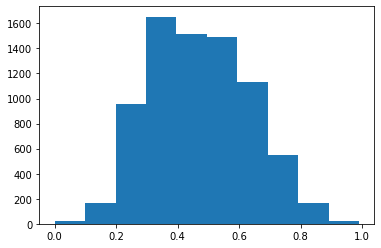

In [ ]:
plt.hist(normalized_all_rscores)

(array([   5.,   68., 1959.,    0., 1628., 2828.,  827.,    0.,  306.,
          53.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

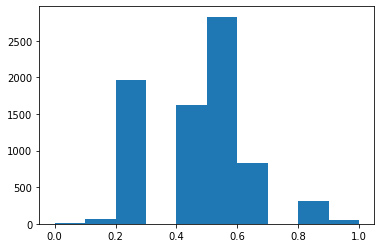

In [ ]:
plt.hist(rounded_normalized_all_rscores)

In [ ]:
gc.collect()

50

# Cosine Score

In [ ]:
import torch.nn
cos_sim = nn.CosineSimilarity(dim=-1, eps=1e-8)

In [ ]:
def flatten_list(user_list): return [item for sublist in user_list for item in sublist]
def get_embedding_tensor(word_list,embeddings): return torch.tensor([embeddings[w] for w in word_list])

In [ ]:
torch.pi = torch.acos(torch.zeros(1)).item() * 2
def cosine_angular_sim(keyword_torch,words_tensor): return 1 - (torch.acos(cos_sim(keyword_torch,words_tensor))) / torch.pi
def cosine_norm_01(keyword_torch,words_tensor): return (cos_sim(keyword_torch,words_tensor) + 1.0)/2.0
def cosine_sqrt(keyword_torch,words_tensor): return 1 - ((1 - cos_sim(keyword_torch,words_tensor) )/2)**0.5

def cosine_keywords(keywords,words_tensor,word_list):
  all_keywords_score = []
  cosine_score_vocab = {}
  keyword_total_score = torch.zeros(len(vocab))
  for k in keywords:
    keyword_torch = torch.from_numpy(embeddings[k])
    keyword_torch = keyword_torch.unsqueeze(0).expand(len(vocab),words_tensor.shape[1])
    all_keywords_score.append(cosine_sqrt(keyword_torch,words_tensor))
    # keyword_total_score += cos_sim(keyword_torch,words_tensor)
  keywords_max_score,keyword_max_score_idx = torch.max(torch.stack(all_keywords_score),dim=0)
  cosine_score_vocab = dict(zip(word_list,keywords_max_score.numpy()))

  return all_keywords_score,keyword_total_score/len(keywords),keywords_max_score,cosine_score_vocab

In [ ]:
sorted_id_word_vocab = sorted(id_vocab.items(), key=lambda x: x[1]) ### alphabetically sorted
word_list = [s[1] for s in sorted_id_word_vocab]
words_tensor = get_embedding_tensor(word_list,embeddings)

all_keywords_score,keywords_mean_score,keywords_max_score,cosine_score_vocab = cosine_keywords(keywords,words_tensor,word_list)

sorted_cosine_words_vocab = sorted(cosine_score_vocab.items(), key=lambda x: x[1]) ### cosine sim score sorted
sorted_cosine_vocab = [s[0] for s in sorted_cosine_words_vocab]

embedding_tensor_sorted_alp = get_embedding_tensor(word_list,embeddings)
embedding_tensor_keywords = get_embedding_tensor(keywords,embeddings)
embedding_tensor_sorted_cos = get_embedding_tensor(sorted_cosine_vocab,embeddings)

In [ ]:
val,idx=torch.sort(keywords_max_score,descending=True)
cosine_flag_testing = torch.zeros(num_input)
cosine_flag_testing[idx[0:500]] = 1.0
# cosine_flag_testing  = cosine_flag_testing.to(device)
ranked_input = torch.ones(num_input)
for i in range(1,num_input+1,1):
  ranked_input[idx[i-1]] = i

In [ ]:
cosine_idx_test = torch.tensor(np.arange(0,num_input))
scaler = MinMaxScaler(feature_range=(0+1e-10, 0.99))
cosine_idx_test_sc = scaler.fit_transform(cosine_idx_test.data.reshape(-1,1))

In [ ]:
np.median(keywords_max_score)

0.3021173

(array([1.988e+03, 9.880e+02, 1.480e+02, 2.130e+02, 2.800e+01, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.2306453 , 0.30758077, 0.38451624, 0.4614517 , 0.5383872 ,
        0.61532265, 0.6922581 , 0.7691936 , 0.84612906, 0.92306453,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

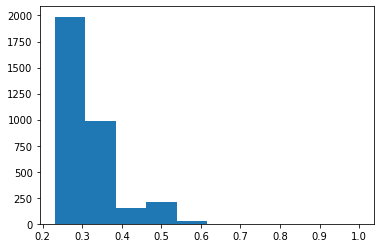

In [ ]:
plt.hist(keywords_max_score)

(array([2867.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         500.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32), <a list of 10 Patch objects>)

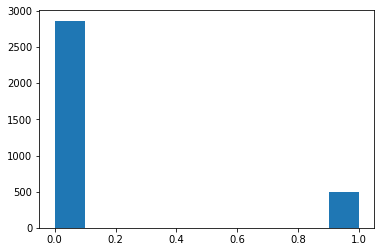

In [ ]:
plt.hist(cosine_flag_testing)

# **Run Model**

In [ ]:
#@title torch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Parameter

In [ ]:
#@title Weight Drop
def _weight_drop(module, weights, dropout):
    """
    Helper for `WeightDrop`.
    """
    for name_w in weights:
        w = getattr(module, name_w)
        del module._parameters[name_w]
        module.register_parameter(name_w + '_raw', Parameter(w))

    original_module_forward = module.forward

    def forward(*args, **kwargs):
        for name_w in weights:
            raw_w = getattr(module, name_w + '_raw')
            w = torch.nn.functional.dropout(raw_w, p=dropout, training=module.training)

            setattr(module, name_w, w)

        # return original_module_forward(*args, **kwargs)

    setattr(module, 'forward', forward)


class WeightDrop(torch.nn.Module):
    """
    The weight-dropped module applies recurrent regularization through a DropConnect mask on the
    hidden-to-hidden recurrent weights.

    **Thank you** to Sales Force for their initial implementation of :class:`WeightDrop`. Here is
    their `License
    <https://github.com/salesforce/awd-lstm-lm/blob/master/LICENSE>`__.

    Args:
        module (:class:`torch.nn.Module`): Containing module.
        weights (:class:`list` of :class:`str`): Names of the module weight parameters to apply a
          dropout too.
        dropout (float): The probability a weight will be dropped.

    Example:

        >>> from torchnlp.nn import WeightDrop
        >>> import torch
        >>>
        >>> torch.manual_seed(123)
        <torch._C.Generator object ...
        >>>
        >>> gru = torch.nn.GRUCell(2, 2)
        >>> weights = ['weight_hh']
        >>> weight_drop_gru = WeightDrop(gru, weights, dropout=0.9)
        >>>
        >>> input_ = torch.randn(3, 2)
        >>> hidden_state = torch.randn(3, 2)
        >>> weight_drop_gru(input_, hidden_state)
        tensor(... grad_fn=<AddBackward0>)
    """

    def __init__(self, module, weights, dropout=0.0):
        super(WeightDrop, self).__init__()
        _weight_drop(module, weights, dropout)
        self.forward = module.forward

class WeightDropLinear(torch.nn.Linear):
    """
    Wrapper around :class:`torch.nn.Linear` that adds ``weight_dropout`` named argument.

    Args:
        weight_dropout (float): The probability a weight will be dropped.
    """

    def __init__(self, *args, weight_dropout=0.0, **kwargs):
        super().__init__(*args, **kwargs)

        weights = ['weight']
        # print('name_w in _weight_drop: ', name_w)
        _weight_drop(self, weights, weight_dropout)

In [ ]:
# @title Targeted Dropout Class
import torch
import torch.nn as nn


class TargetedDropout(nn.Module):
    """
    Learning Sparse Networks Using Targeted Dropout
    https://arxiv.org/abs/1905.13678
    """

    def __init__(self,targeted="weight",target_layer=None,
                 dropout_rate=0.5,targeted_portion=0.5):
        super(TargetedDropout, self).__init__()
        self.targeted = targeted
        self.target_layer = target_layer
        self.dropout_rate = dropout_rate
        self.targeted_portion = targeted_portion
        self.weight = target_layer.weight

        if self.targeted == "weight":
            self.targeted_dropout = targeted_weight_dropout
        elif self.targeted == "unit":
            self.targeted_dropout = targeted_unit_dropout

    def forward(self):
        self.weight = self.targeted_dropout(
            weight=self.target_layer.weight,
            dropout_rate=self.dropout_rate,
            targeted_portion=self.targeted_portion,
            is_training=self.training,
        )

        self.target_layer.weight = self.weight
        # output = self.target_layer(x)
        return self.weight

    def extra_repr(self):
        return f"targeted={self.targeted}, dropout_rate={self.dropout_rate}, targeted_portion={self.targeted_portion}"


def targeted_weight_dropout(weight, dropout_rate, targeted_portion, is_training):
    weight_shape = weight.shape
    weight = torch.reshape(weight, [-1, weight_shape[-1]]).float()

    norm = torch.abs(weight)
    idx = int(targeted_portion * torch.tensor(weight.shape[0]).float())
    threshold = torch.sort(norm, dim=0)[0][idx]
    mask = norm < threshold[None, :]

    if not is_training:
        mask = (torch.rand_like(weight) < dropout_rate).to(mask.device.type) & mask

    weight = (1.0 - mask.float()) * weight
    weight = torch.reshape(weight, weight_shape)
    weight = torch.nn.Parameter(weight)

    return weight

def targeted_unit_dropout(weight, dropout_rate, targeted_portion, is_training):
    weight_shape = weight.shape
    weight = torch.reshape(weight, [-1, weight_shape[-1]]).float()

    norm = torch.norm(weight, dim=0)
    idx = int(targeted_portion * int(weight.shape[1]))
    sorted_norms = torch.sort(norm)[0]
    threshold = sorted_norms[idx]
    mask = (norm < threshold)[None, :]
    mask = mask.repeat(weight.shape[0], 1)

    if not is_training:
        mask = torch.where(
            ((1.0 - dropout_rate) < torch.rand_like(weight)).to(mask.device.type)
            & mask,
            torch.ones_like(weight, dtype=torch.float32),
            torch.zeros_like(weight, dtype=torch.float32),
        )

    weight = (1.0 - mask.float()) * weight
    weight = torch.reshape(weight, weight_shape)
    weight = torch.nn.Parameter(weight)

    return weight

## Functions (Plot_loss, get_topwords, get_Z, get_Contour, print_Topics)

In [ ]:
#@title get_all_tensor_size
def getall_tensor_size():
  for obj in gc.get_objects():
    try:
        if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
            print(type(obj), obj.size(),get_mem_size(obj))
    except:
        pass

In [ ]:
import plotly.graph_objects as go
def plot_loss(y,name):
  figure = go.Figure()
  figure.add_trace(go.Scatter(x=[i for i in range(1,epochs+1)], y=y,mode='lines',name=name))
  figure.show(renderer='colab')

In [ ]:
def get_topwords(beta, id_vocab,topwords):
    topic_indx = 0
    topwords_topic = []
    topic_topwords = topwords
    for i in range(len(beta)):
        topwords_topic.append( str(topic_indx)+": "+ " ".join([id_vocab[j] for j in beta[i].argsort()[:-topic_topwords - 1:-1]]))
        topic_indx+=1
    return topwords_topic

In [ ]:
def get_Z(X,Y):
  norms = torch.zeros(X.shape)
  Z = torch.zeros(X.shape)

  for i in range(X.shape[0]):
    for j in range(X.shape[0]):
      v = torch.tensor([X[i][j],Y[i][j]])

      norms[i][j] = torch.norm(v)
      Z[i][j]=torch.exp(-0.5 * (torch.pow(norms[i][j],2))/mu_div)

      # norms[i][j] = (v-query_center.T).pow(2).sum(-1)
      # Z[i][j]=torch.exp(-0.5 * norms[i][j]/mu_div)
  return Z

In [ ]:
def get_Contour(ax,x_list,lim):
  xlist = np.linspace(-lim, lim, 200)
  ylist = np.linspace(-lim, lim, 200)
  X, Y = np.meshgrid(xlist, ylist)
  Z = get_Z(X,Y)
  levels = np.arange(0,1,0.1)
  cp = ax.contour(X, Y, Z, levels=levels)
  ax.clabel(cp, inline=1, fontsize=10)

In [ ]:
import seaborn as sb

def plot_fig(zx, labels_list, zphi, query_center,query_words,lim,contour='No'):
    labels = []
    for i in range(len(labels_list)):
        labels.append('C'+str(labels_list[i]))
    fig, ax = plt.subplots( figsize=(20, 20))
    if contour=='yes':
       get_Contour(ax,zx,lim)

    sb.scatterplot(ax=ax,x=zx[:,0],y=zx[:,1],hue=labels_list,alpha=0.8,palette='deep')
    ax.set(ylim=(-lim,lim))
    ax.set(xlim=(-lim,lim))

    ax.text(query_center[0],query_center[1], 'X' ,c='red')
    # ax.text(0,0, 'X' ,c='black')
    # for i in range(len(query_words)):
    #   if (i==len(query_words)-1):
    #     ax.text(query_words[i][0],query_words[i][1], 'X'+keywords[i] ,c='black')
    #   else:
    #     ax.text(query_words[i][0],query_words[i][1], 'X'+keywords[i] ,c='black')

    ax.scatter(zphi[:, 0], zphi[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=30)

    for indx, topic in enumerate(zphi):
        ax.text(zphi[indx, 0], zphi[indx, 1], 'topic'+str(indx))

In [ ]:
def print_Topics(topwords):
  print("---"*10)
  topword_topics = get_topwords(beta, id_vocab,topwords)
  topword_topics_list=[]
  for topwords in topword_topics:
      topword_topics_list.append(topwords.split())
      print(topwords)
  print("---"*10)

## Train Model

In [ ]:
torch.cuda.empty_cache()
mu_div=200.0
smoothen=1e-20
sig=100.0

def torch_lgamma(a): return torch.lgamma(torch.tensor(a))
def torch_gamma(a): return torch.exp(torch.lgamma(torch.tensor(a)))

def min_max_normalization(ip):
  vmax,_ = torch.max(ip,-1)
  vmin,_ = torch.min(ip,-1)
  vmax = vmax.unsqueeze(-1).expand(ip.shape[0],ip.shape[1])
  vmin= vmin.unsqueeze(-1).expand(ip.shape[0],ip.shape[1])
  ip = (ip - vmin) / (vmax-vmin+smoothen)
  return ip

def NewBeta_dist(x,mu,phi_beta,smoothen):
  First = torch_lgamma(phi_beta+smoothen) - (torch_lgamma(phi_beta * mu+smoothen) + torch_lgamma(phi_beta * (1-mu)+smoothen ))
  Second_1 = (mu*phi_beta-1) * torch.log(x+smoothen)
  Second_2 = ( (1-mu)*phi_beta-1 )* torch.log(1-x+smoothen)
  Second = Second_1 + Second_2
  return First + Second

def LogL_NewBeta(x,relevant_scores):
  x_norm = torch.norm(x,dim=-1)
  mu = torch.exp(-0.5 * (torch.pow(x_norm,2))/mu_div)
  # LogL = torch.log(NewBeta_dist(relevant_scores,mu,sig,smoothen)+smoothen)
  LogL = NewBeta_dist(relevant_scores,mu,sig,smoothen)
  return LogL

#phi
def gaussian(alpha): return -0.5*alpha
def inverse_multi_quadric(alpha): return -0.5*torch.log(torch.ones_like(alpha) + alpha)
def inverse_quadratic(alpha): return -torch.log(torch.ones_like(alpha) + alpha)

class Model(nn.Module):
    def __init__(self, num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs,
                 embedding_words,embedding_keywords, word_emb_size,num_keyword, distance="gaussian"):

        super(Model, self).__init__()
        self.num_input, self.num_coordinate, self.num_topic, self.variance_x, self.bs ,self.word_emb_size, self.num_keyword \
            = num_input, num_coordinate, num_topic, variance_x, bs,word_emb_size,num_keyword

        self.word_emb = embedding_words
        self.embeddings_keys = embedding_keywords
        # self.embeddings_key_red = embedding_key_red

        # encoder
        self.en1_fc     = nn.Linear(num_input, en1_units_x)             # V -> 100 #nxV->(vxh1)->nxh1;
        self.en2_fc     = nn.Linear(en1_units_x, en2_units_x)             # 100  -> 100
        self.en2_drop   = nn.Dropout(drop_rate)
        self.mean_fc    = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.mean_bn    = nn.BatchNorm1d(num_coordinate)              # bn for mean
        self.logvar_fc  = nn.Linear(en2_units_x, num_coordinate)        # 100  -> 2
        self.logvar_bn  = nn.BatchNorm1d(num_coordinate)              # bn for logvar

        # RBF
        self.in_features = self.num_coordinate
        self.out_features = self.num_topic
        self.centres = nn.Parameter(torch.Tensor(self.out_features, self.in_features))
        self.query_center = nn.Parameter(torch.zeros(2,1))

        self.threshold = nn.Parameter(torch.ones(1)*0.75)
        self.query_words = nn.Parameter(torch.Tensor(self.num_keyword,self.in_features))

        if distance=="gaussian": self.basis_func = gaussian
        if distance=="inverse_quadratic": self.basis_func = inverse_quadratic
        if distance=="inverse_multi_quadric": self.basis_func = inverse_multi_quadric
        self.init_parameters()

        # self.topic_embedding = nn.Parameter(300,self.num_topic) # 300 x K
        # self.topic_embedding = nn.Linear(self.word_emb_size,self.num_topic,bias=False) # 300 x K

        self.topic1_fc     = nn.Linear(self.in_features, en1_units_x)
        self.topic2_fc     = nn.Linear(en1_units_x, en2_units_x)
        self.topic2_drop   = nn.Dropout(drop_rate)
        self.topic_mapping = nn.Linear(en2_units_x, self.word_emb_size)
        self.topic_embeddings = 0

        # decoder layer
        self.decoder    = nn.Linear(self.num_topic, self.num_input)             # 50   -> 1995
        self.decoder_bn = nn.BatchNorm1d(self.num_topic)                      # bn for decoder

        # decoder document
        self.decoder_phi_bn = nn.BatchNorm1d(num_coordinate)                      # bn for decoder
        self.decoder_x_bn = nn.BatchNorm1d(num_coordinate)
        self.decoder_q_bn = nn.BatchNorm1d(num_coordinate)

        # prior mean and variance as constant buffers
        prior_mean   = torch.Tensor(1, num_coordinate).fill_(0)
        prior_var    = torch.Tensor(1, num_coordinate).fill_(variance_x)
        self.prior_mean = nn.Parameter(prior_mean, requires_grad=False)
        self.prior_var  = nn.Parameter(prior_var, requires_grad=False)
        self.prior_logvar = nn.Parameter(prior_var.log(), requires_grad=False)


    def init_parameters(self):
        nn.init.normal_(self.centres, 0, 0.01)
        nn.init.normal_(self.query_words, 0, 0.01)


    def get_beta(self):
        cos_v = self.cosine_score.unsqueeze(-1).expand(self.num_input,self.out_features)

        # cos_v_2 = torch.cat((cos_v.unsqueeze(-1),(1-cos_v).unsqueeze(-1)),-1)
        # cs_cheat_2 = cosine_flag_cheating.unsqueeze(-1).expand(self.num_input,self.out_features)

############ beta ##########
        # # beta_param = torch.mm(self.word_emb,self.topic_embedding) # V x 300 * 300 x K
        # beta = F.softmax(beta_param,dim=0).transpose(1,0) ## softmax over vocab dimension # KxV

        # beta_param = self.topic_embedding(self.word_emb)
        # vt2 = beta_param.unsqueeze(-1).expand(self.num_input,self.out_features,2)
        # beta = F.softmax(vt2 * cos_v_2 ,dim=0).transpose(1,0) ## word embedding beta

        t1 = F.softplus(self.topic1_fc(self.decoder_phi_bn(self.centres)))
        t2 = F.softplus(self.topic2_fc(t1))
        # t2 = self.topic2_drop(t2)
        self.topic_embeddings = self.topic_mapping(t2) # 300 x K

        # vt = torch.mm(self.word_emb,self.topic_embeddings.T)
        # beta = F.softmax(vt,dim=0).transpose(1,0)

        # vt2 = torch.mm(self.word_emb,self.topic_embeddings.T).unsqueeze(-1).expand(self.num_input,self.out_features,2)
        # beta = F.softmax(vt2 * cos_v_2 ,dim=0).transpose(1,0) ## word embedding beta

        # vt2 = (self.decoder_bn(self.decoder.weight)).unsqueeze(-1).expand(self.num_input,self.out_features,2)
        # beta = F.softmax((vt2 * cos_v_2).sum(-1),dim=0).transpose(1,0) ## FoTo Doc Model beta

        beta = F.softmax((self.decoder_bn(self.decoder.weight)),dim=0).transpose(1,0) ## PLSV beta

        return beta

    def encode(self, input_):
        N, *_ = input_.size()
        en1 = F.softplus(self.en1_fc(input_))                           # en1_fc   output
        en2 = F.softplus(self.en2_fc(en1))                              # encoder2 output
        en2 = self.en2_drop(en2)
        posterior_mean   = self.mean_bn  (self.mean_fc  (en2))          # posterior mean
        posterior_logvar = self.logvar_bn(self.logvar_fc(en2))          # posterior log variance
        posterior_var    = posterior_logvar.exp()

        return en2, posterior_mean, posterior_logvar, posterior_var

    def take_sample(self, input_, posterior_mean, posterior_var, prior_var):
        eps = input_.data.new().resize_as_(posterior_mean.data).normal_(std=1) # noise
        z = posterior_mean + posterior_var.sqrt() * eps                   # reparameterization
        return z

    def decode(self, z):
        N, *_ = z.size()
        zx = self.decoder_x_bn(z).view(N, 1, self.num_coordinate) # Nx1xX
        size = (N, self.out_features, self.in_features) # N,K,2
        x = zx.expand(size)
        c = self.decoder_phi_bn(self.centres).unsqueeze(0).expand(size)
        d = (x-c).pow(2).sum(-1)
        distances = self.basis_func(d)
        zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True)) # theta

        # N, *_ = z.size()
        # zx = self.decoder_x_bn(z).view(N, 1, 1,self.num_coordinate) # Nx1x1xX
        # size = (N, self.out_features,self.num_keyword, self.in_features) # N,K,Q,2
        # x = zx.expand(size)
        # c = self.decoder_phi_bn(self.centres).unsqueeze(1).unsqueeze(0).expand(size)
        # qw = self.decoder_q_bn(self.embeddings_key_red).unsqueeze(0).unsqueeze(0).expand(size)
        # d = (x-c-qw).pow(2).sum(-1).sum(-1)
        # distances = self.basis_func(d)
        # zx_phi = torch.exp(distances - torch.logsumexp(distances, dim=-1, keepdim=True)) # theta

        # recon_v = torch.mm(zx_phi, F.softmax(self.decoder_bn(self.decoder.weight).transpose(1,0), dim=-1)) # sum(Theta . Beta)

        beta = self.get_beta()
        recon_v = torch.mm(zx_phi, beta) ## (N x T) * (T x V)

        return recon_v, zx, zx_phi, d, c

    def forward(self, input_, relevant_scores,cosine_score, compute_loss=False):
        en2, posterior_mean, posterior_logvar, posterior_var = self.encode(input_)
        z = self.take_sample(input_, posterior_mean, posterior_var, self.variance_x)
        self.cosine_score = cosine_score
        recon_v, zx, zx_phi,d,c= self.decode(z)

        if compute_loss:
            return recon_v, self.loss(input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores, cosine_score,zx)
        else: return z, recon_v, zx, zx_phi

    def KLD(self, posterior_mean,posterior_logvar,posterior_var):
        N = posterior_mean.shape[0]
        prior_mean   = self.prior_mean.expand_as(posterior_mean)
        prior_var    = self.prior_var.expand_as(posterior_mean)
        prior_logvar = self.prior_logvar.expand_as(posterior_mean)

        var_division    = posterior_var  / prior_var
        diff            = posterior_mean - prior_mean
        diff_term       = diff * diff / prior_var
        logvar_division = prior_logvar - posterior_logvar

        xKLD = 0.5 * ((var_division + diff_term + logvar_division).sum(-1) - self.num_coordinate)
        return xKLD

    def loss(self, input_, recon_v, zx_phi, posterior_mean, posterior_logvar, posterior_var, d, c, relevant_scores,cosine_score, zx, avg=True):
        N = posterior_mean.shape[0]

##########
        # size_nv2 = (N,self.num_input,2)
        # cos_nv = 1.0/((cosine_score)*(cosine_score+1))
        # cos_nv = 1.0/( (cosine_score)**(1/4) )

        # cosine_score=cosine_score-self.threshold
        # cos_nv = torch.heaviside(cosine_score,torch.tensor(0.0))

        #cosine_score[idx[:500]] = 0.5
        #cosine_score[idx[500:]] = 0.00001
        cos_nv = cosine_score
        # cos_r_nv = cos_nv.unsqueeze(0).expand(N,self.num_input)


        #relv_nv = relevant_scores.expand(N,self.num_input)
        #rel_cos_nv = min_max_normalization(cos_nv /(1.0-relv_nv+smoothen))


        #renormalize [0,1]
        # recon_v_2 = recon_v.unsqueeze(-1).expand(size_nv2)
        # input_v_2 = input_.unsqueeze(-1).expand(size_nv2)

        # cos_vocab_p =torch.cat((cos_nv.unsqueeze(-1),(1-cos_nv).unsqueeze(-1)),-1) # N x V x 2
        # NL = - (input_v_2 * ( (recon_v_2 * cos_vocab_p) + 1e-10).log()).sum(-1).sum(-1)

##########

        # NL = - (input_ * (recon_v * relv_nv +1e-30).log()).sum(-1)
        NL = - (input_ * (recon_v * cos_r_nv +1e-30).log()).sum(-1)

        # NL = - (input_ * (recon_v +1e-30).log()).sum(-1)

        NL= NL.sum()
        KLD = self.KLD(posterior_mean,posterior_logvar,posterior_var).sum()
        NegativeLogL_RScore = - LogL_NewBeta(zx,relevant_scores).sum()

        ## cosine_sim ==> cosine between words and keywords
        ## Term_selector ~ Bernoulli(cosine_sim) ... Needs to be integrated, Not on batch size(N), it is on topic and vocab
        ## Multiply with beta
        ## ( ][_t then sum over all possible cases of term selector(t(latent)) )
        ## What is the Likelihood

        ## include that to make topic modelling better
        ### How to generate term selector using visualization coordinate

        loss = NL + KLD + NegativeLogL_RScore

        return loss/N, NL,KLD, NegativeLogL_RScore

In [ ]:
num_keyword = embedding_tensor_keywords.shape[0]
emb_size = embedding_tensor_keywords.shape[1]
cos_sim = nn.CosineSimilarity(dim=-1, eps=1e-8)

embedding_tensor_words = embedding_tensor_sorted_alp ## alphabetically sorted Vocab

embedding_tensor_words = embedding_tensor_words.to(device)
embedding_tensor_keywords = embedding_tensor_keywords.to(device)

model = Model(num_input, en1_units_x, en2_units_x, num_coordinate, num_topic, drop_rate, variance_x, bs,
              embedding_tensor_words,embedding_tensor_keywords,emb_size,num_keyword, "inverse_quadratic")

model.to(device)

# optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2), weight_decay=0.01) # L2 for loss
optimizer = optim.Adam(model.parameters(), learning_rate, betas=(beta1, beta2))

epochs = 1000

kld_arr,recon_arr,neg_log_rscore_arr = [],[],[]
all_indices = torch.randperm(tensor_train_w.size(0)).split(bs)
# cosine_score = torch.bernoulli(keywords_max_score).to(device)

for epoch in range(epochs):

    loss_u_epoch = 0.0 ## NL loss
    loss_KLD = 0.0  ## KL loss
    loss_epoch = 0.0 ## Loss per batch #
    neg_log_rscore_ep = 0.0 ## Neg Loss (Score)

    model.train()

    for batch_ndx in all_indices:

        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]
        relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        # cosine_score = keywords_max_score.to(device)
        cosine_score = cosine_flag_testing.to(device)
        # cosine_score = torch.bernoulli(keywords_max_score).to(device)
        # ranked_input_d = ranked_input.to(device)
        recon_v, (loss, loss_u, xkl_loss, neg_log_rscore) = model(input_w, relevant_scores, cosine_score,compute_loss=True)

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()             # backpror.step()
        loss_epoch += loss.item()
        loss_u_epoch += loss_u.item()
        loss_KLD += xkl_loss.item()
        neg_log_rscore_ep += neg_log_rscore.item()

    kld_arr.append(loss_KLD)
    recon_arr.append(loss_u_epoch)
    neg_log_rscore_arr.append(neg_log_rscore_ep)

    if epoch % 10 == 0:
        print('Epoch -> {} , loss -> {}'.format(epoch,loss_epoch))
        print('recon_loss==> {} || KLD==> {} || neg_loss==> {}'.format(loss_u_epoch, loss_KLD,neg_log_rscore_ep))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Epoch -> 0 , loss -> 94954.70543893748
recon_loss==> 23646031.0 || KLD==> 12108.413879394531 || neg_loss==> 631316.6137773229
Epoch -> 10 , loss -> 93512.88185983167
recon_loss==> 23282868.5625 || KLD==> 5887.071472167969 || neg_loss==> 631833.808498779
Epoch -> 20 , loss -> 93406.77473768294
recon_loss==> 23267315.6875 || KLD==> 7059.9415283203125 || neg_loss==> 619071.3143462767
Epoch -> 30 , loss -> 93308.63838106871
recon_loss==> 23259441.6875 || KLD==> 11566.70083618164 || neg_loss==> 597367.8129028972
Epoch -> 40 , loss -> 93234.15653764077
recon_loss==> 23256403.0 || KLD==> 12813.939392089844 || neg_loss==> 580103.3790399741
Epoch -> 50 , loss -> 93198.43022236186
recon_loss==> 23252772.5625 || KLD==> 13914.83740234375 || neg_loss==> 573465.3045600458
Epoch -> 60 , loss -> 93161.76655877085
recon_loss==> 23249900.25 || KLD==> 17593.409057617188 || neg_loss==> 563326.2184679249
Epoch -> 70 , loss -> 93086.21592822677
recon_loss==> 23248417.3125 || KLD==> 13844.46728515625 || neg_

# **Plots,Topics,Visualizations**

In [ ]:
plot_loss(neg_log_rscore_arr,"neg")

In [ ]:
plot_loss(recon_arr,"Recon")

In [ ]:
model.eval()
x_list = []
labels_list = []
doc_ids = []
zx_phi_list=[]

with torch.no_grad():
    for batch_ndx in all_indices:
        input_w = tensor_train_w[batch_ndx].to(device)
        labels = train_label[batch_ndx]

        relevant_scores = rounded_normalized_all_rscores[batch_ndx].to(device).unsqueeze(-1)
        # cosine_score = keywords_max_score.to(device)
        cosine_score = cosine_flag_testing.to(device)
        # ranked_input_d = ranked_input.to(device)
        labels_list.extend(labels)

        z, recon_v, zx, zx_phi = model(input_w, relevant_scores,cosine_score,compute_loss=False)
        zx = zx.view(-1, num_coordinate).data.detach().cpu().numpy()
        zx_phi = zx_phi.view(-1, num_topic).data.detach().cpu().numpy()
        zx_phi_list.extend(zx_phi)
        x_list.extend(zx)
        doc_ids.extend(batch_ndx)

    x_list = np.array(x_list)

    # beta = model.decoder.weight.data.cpu().numpy().T#
    beta = model.get_beta().data.cpu().numpy()
    zphi = model.decoder_phi_bn(model.centres).data.cpu().numpy()
    query_center = model.query_center.data.cpu().numpy()
    threshold_model = model.threshold.data.cpu().numpy()
    # query_words = model.decoder_q_bn(embedding_key_red).data.cpu().numpy()

In [ ]:
print_Topics(topwords=10)

------------------------------
0: inc pct ltd corp canadian canada america england york chicago
1: world reagan ec dealer washington paris german product germany piedmont
2: pct canada inc twa canadian product sec le february october
3: pct china british saudi french ab de france brazil swedish
4: mln inc dlr february product ltd corp november brazilian york
5: dlrs corp due hutton continental ltd june williams swiss pc
6: ct oper mln mths inc corp yr avg mth corrects
7: opec mln ecuador saudi iran soviet arabia iranian december venezuela
8: ct shr qtr st mln corp feb jan ltd american
9: mln shr rev mths corp qtr aug avg product na
10: dlrs january december brazil september due august dutch morgan pct
11: dlrs mln shr qtr rev ct dlr mths corp dec
12: american corp dlrs texas pacific pct chrysler product inc mln
13: mln rev shr inc ct mths dec sept nov august
14: ct dlrs shrs avg qtr nd jan dlr sept july
15: dlrs shr qtr mln rev dlr jan dec mths corp
16: ct april div qtly inc corp june 

In [ ]:
get_keywords(d_data),threshold_model

(['usa'], array([0.75], dtype=float32))

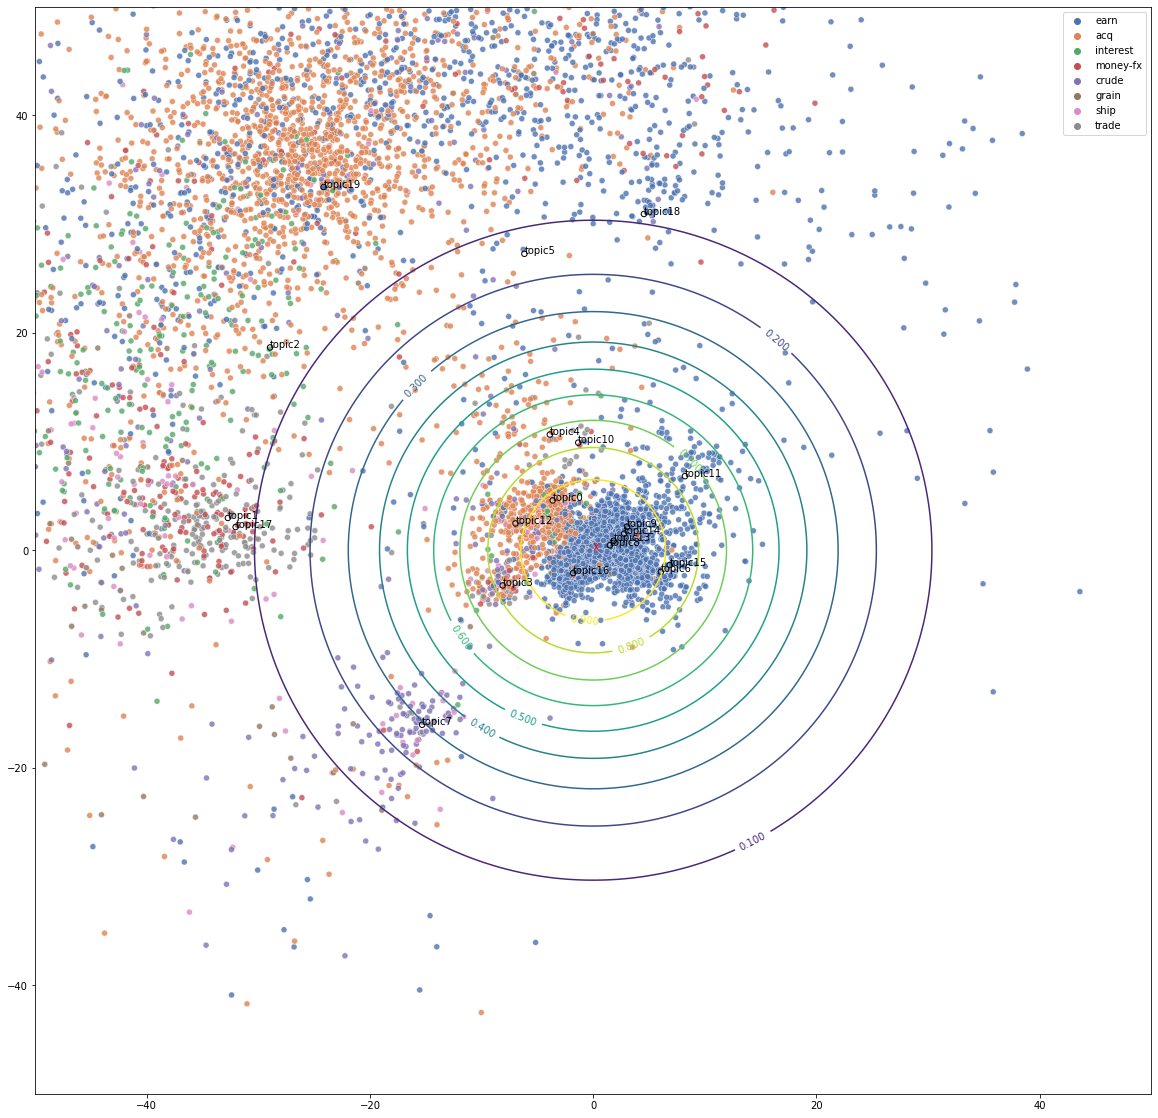

In [ ]:
plot_fig(x_list, labels_list, zphi,query_center,query_words=[0,0],lim =50,contour='yes')

# ____ STOP____

In [ ]:
STOP!!!!

In [ ]:
STOP!!!!

In [ ]:
STOP!!!!

# Save/Download Results

In [ ]:
doc_ids_model = [i.item() for i in doc_ids]

In [ ]:
save_obj(get_topwords(beta, id_vocab),"top100_docmodel_"+d_data)

In [ ]:
save_obj(x_list,"x_list")
save_obj(indices,"doc_id_desm")
save_obj(doc_ids_model,"doc_ids_model")
save_obj(labels_list,"labels_list")
save_obj(all_rscores,"all_rscores")
save_obj(keywords,'keywords_'+d_data)

In [ ]:
from google.colab import files
files.download("doc_ids_model.pkl")
files.download("doc_id_desm.pkl")
files.download("x_list.pkl")
files.download("labels_list.pkl")
files.download("all_rscores.pkl")
files.download("keywords_"+d_data+".pkl")
files.download("top100_docmodel_"+d_data+".pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rm -r *.pkl*